# Proyek Klasifikasi Gambar: Flower Image Classification
- **Nama:** Shendi Teuku Maulana Efendi
- **Email:** shendyteuku2@gmail.com
- **ID Dicoding:** shendyeff

## Import Semua Packages/Library yang Digunakan

## Import Semua Packages/Library yang Digunakan <br>
Menghindari session crash saat menyimpan model TFLite Karena defaultnya di google collab sudah terinstall tensorflow, dan tensorflow itu versi 2.15.0, sedangkan yang kamu install versi terbaru (jadi ketika menginstall package lagi bertubrukan dengan versi lama)  yang menyebabkan runtime error (restart).


In [1]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 36.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


In [2]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [3]:
# Import standard libraries
import os
import random
import shutil
import pathlib
import glob
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
import cv2
import gdown

# Suppress warnings
warnings.filterwarnings('ignore')

# Import TensorFlow and Keras libraries
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dropout, Dense,
    GlobalAveragePooling2D, BatchNormalization
)
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2B0, MobileNetV2
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
print(f'TensorFlow version: {tf.__version__}')

TensorFlow version: 2.15.0


## Data Preparation

Link dataset: https://drive.google.com/file/d/1m9UBYCzLElZ8x_-b_jysE7A9y-jSq04u/view?usp=drive_link

### Data Loading

In [5]:
file_id = '1m9UBYCzLElZ8x_-b_jysE7A9y-jSq04u'

# URL untuk mendownload file
url = f'https://drive.google.com/uc?id={file_id}'

# Path untuk menyimpan file
output = '/content/dataset-flowers.zip'

# Mendownload file
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1m9UBYCzLElZ8x_-b_jysE7A9y-jSq04u
From (redirected): https://drive.google.com/uc?id=1m9UBYCzLElZ8x_-b_jysE7A9y-jSq04u&confirm=t&uuid=a71fff62-4b3a-466a-b938-0a8ed8dd06e4
To: /content/dataset-flowers.zip
100%|██████████| 215M/215M [00:03<00:00, 56.9MB/s]


'/content/dataset-flowers.zip'

In [6]:
!unzip dataset-flowers.zip -d dataset-flowers/

Streaming output truncated to the last 5000 lines.
  inflating: dataset-flowers/train/iris/17858672081_4b4d071116_c.jpg  
  inflating: dataset-flowers/train/iris/17885928250_451875aec2_c.jpg  
  inflating: dataset-flowers/train/iris/17948299355_2161a031db_c.jpg  
  inflating: dataset-flowers/train/iris/17959086836_3e706d918b_c.jpg  
  inflating: dataset-flowers/train/iris/18054931376_23052f68d0_c.jpg  
  inflating: dataset-flowers/train/iris/18059533553_186ccb451a_c.jpg  
  inflating: dataset-flowers/train/iris/18076633321_400ea17b5a_c.jpg  
  inflating: dataset-flowers/train/iris/18120244292_ea11fcc9c5_c.jpg  
  inflating: dataset-flowers/train/iris/181379030_afebe26851_c.jpg  
  inflating: dataset-flowers/train/iris/18141122602_118114762d_c.jpg  
  inflating: dataset-flowers/train/iris/18256508742_af6a8f4222_c.jpg  
  inflating: dataset-flowers/train/iris/18280071332_c6bc90d75a_c.jpg  
  inflating: dataset-flowers/train/iris/18348714266_33a7bf205f_c.jpg  
  inflating: dataset-flowers

In [7]:
def count_images_and_resolution(base_path, target_resolution=None):
    # Dictionary untuk menyimpan jumlah gambar per kelas
    class_count = {}

    # Dictionary untuk menyimpan jumlah gambar per resolusi
    resolution_count = {}

    for root, dirs, files in os.walk(base_path):
        # Mengabaikan folder root yang tidak memiliki gambar
        if root == base_path:
            continue
        class_name = os.path.basename(root)
        class_count[class_name] = len(files)

        for file in files:
            file_path = os.path.join(root, file)
            # Check if the file is an image file
            if not file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                continue # Skip if not an image file
            with Image.open(file_path) as img:
                width, height = img.size
                resolution = f"{width}x{height}"
                if resolution not in resolution_count:
                    resolution_count[resolution] = 0
                resolution_count[resolution] += 1

                # Menghitung jumlah gambar dengan resolusi target_resolution
                if target_resolution and resolution == target_resolution:
                    if 'target' not in resolution_count:
                        resolution_count['target'] = 0
                    resolution_count['target'] += 1

    return class_count, resolution_count

# Path ke folder utama
base_path = "/content/dataset-flowers"

# Resolusi yang ingin dihitung
target_resolution = "256x256"

class_count, resolution_count = count_images_and_resolution(base_path, target_resolution)

# Menampilkan hasil
print("Jumlah gambar per kelas:")
for class_name, count in class_count.items():
    print(f"{class_name}: {count}")

print("\nJumlah gambar per resolusi:")
for resolution, count in resolution_count.items():
    print(f"{resolution}: {count}")

Jumlah gambar per kelas:
train: 1
rose: 7
tulip: 7
astilbe: 7
sunflower: 7
black_eyed_susan: 7
bellflower: 7
dandelion: 7
water_lily: 7
carnation: 7
california_poppy: 7
calendula: 7
common_daisy: 7
iris: 7
coreopsis: 7
val: 1

Jumlah gambar per resolusi:
256x256: 12756
target: 12756
800x600: 76
799x533: 238
800x612: 2
799x528: 1
533x799: 22
799x571: 30
800x533: 27
800x449: 7
800x683: 1
800x572: 5
800x532: 7
800x627: 1
800x534: 52
800x524: 3
799x534: 23
800x743: 1
800x341: 1
800x540: 5
534x800: 10
800x522: 1
800x730: 3
800x800: 50
571x799: 3
800x640: 15
799x438: 1
799x540: 2
799x564: 2
800x595: 4
600x800: 8
800x416: 1
800x799: 5
799x582: 2
800x736: 1
536x800: 1
800x512: 2
799x594: 1
800x549: 2
618x800: 1
799x555: 1
799x671: 1
799x471: 1
800x536: 7
800x531: 7
799x507: 1
800x561: 4
800x529: 2
800x632: 1
799x495: 2
800x400: 2
799x548: 2
799x794: 1
800x450: 23
799x800: 6
694x800: 1
800x602: 3
800x468: 3
596x799: 1
800x463: 2
755x750: 1
800x542: 2
800x525: 3
800x448: 1
800x687: 1
800x513: 2


terlihat bahwa dataset memiliki berbagai image resolution

In [8]:
#Create Files_Name
image_data='/content/dataset-flowers/train'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,rose
1,tulip
2,astilbe
3,sunflower
4,black_eyed_susan
5,bellflower
6,dandelion
7,water_lily
8,carnation
9,california_poppy


In [9]:
#Create Files_Name
image_test_data='/content/dataset-flowers/val'
pd.DataFrame(os.listdir(image_test_data),columns=['Files_Name'])

,Files_Name
0,rose
1,tulip
2,astilbe
3,sunflower
4,black_eyed_susan
5,bellflower
6,dandelion
7,water_lily
8,carnation
9,california_poppy


In [10]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pd.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,/content/dataset-flowers/train/water_lily/2896...,water_lily
1,/content/dataset-flowers/train/carnation/40102...,carnation
2,/content/dataset-flowers/train/tulip/348314964...,tulip
3,/content/dataset-flowers/train/dandelion/56854...,dandelion
4,/content/dataset-flowers/train/tulip/864446123...,tulip
...,...,...
13637,/content/dataset-flowers/train/carnation/41371...,carnation
13638,/content/dataset-flowers/train/tulip/268307031...,tulip
13639,/content/dataset-flowers/train/carnation/23032...,carnation
13640,/content/dataset-flowers/train/california_popp...,california_poppy


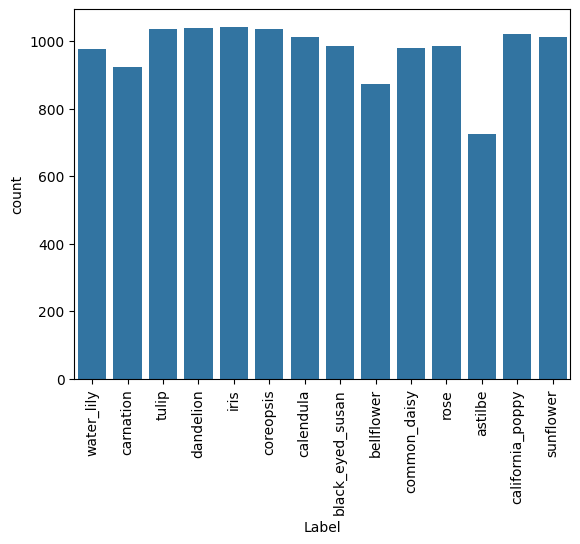

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = dataframe["Label"])
plt.xticks(rotation = 90);

### Data Preprocessing

#### Split Dataset

In [12]:
train_data_dir =image_data
batch_size = 32
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)

Found 13642 files belonging to 14 classes.
Using 10914 files for training.
Found 13642 files belonging to 14 classes.
Using 2728 files for validation.


In [13]:
class_names = train.class_names
class_names

['astilbe',
 'bellflower',
 'black_eyed_susan',
 'calendula',
 'california_poppy',
 'carnation',
 'common_daisy',
 'coreopsis',
 'dandelion',
 'iris',
 'rose',
 'sunflower',
 'tulip',
 'water_lily']

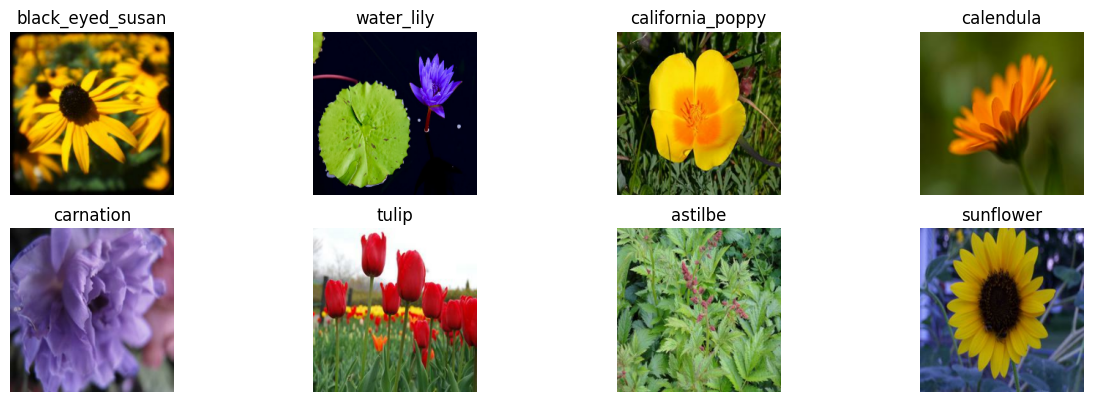

In [14]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## Modelling

In [15]:
base_model = tf.keras.applications.MobileNetV3Large(input_shape=(224,224,3), include_top=False, weights='imagenet')
base_model.trainable = False

keras_model = tf.keras.models.Sequential()

# Add Input layer
keras_model.add(tf.keras.Input(shape=(224,224,3)))

# Add base model (MobileNetV3Large)
keras_model.add(base_model)

# Add custom layers: Conv2D and MaxPooling2D
keras_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'))  # 64 filters, 3x3 kernel, add padding
keras_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))         # Max Pooling with 2x2 pool size

keras_model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding='same')) # 128 filters, 3x3 kernel, add padding
keras_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))         # Max Pooling with 2x2 pool size

# Flatten and add Dense layers
keras_model.add(tf.keras.layers.Flatten())
keras_model.add(tf.keras.layers.Dropout(0.5))
keras_model.add(tf.keras.layers.Dense(14, activation=tf.nn.softmax))

# Print model summary
keras_model.summary()

12683000/12683000 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Function  (None, 7, 7, 960)         2996352   
 al)                                                             
                                                                 
 conv2d (Conv2D)             (None, 7, 7, 64)          553024    
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 64)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 1, 1, 128)         0         
 g2D)                                                    

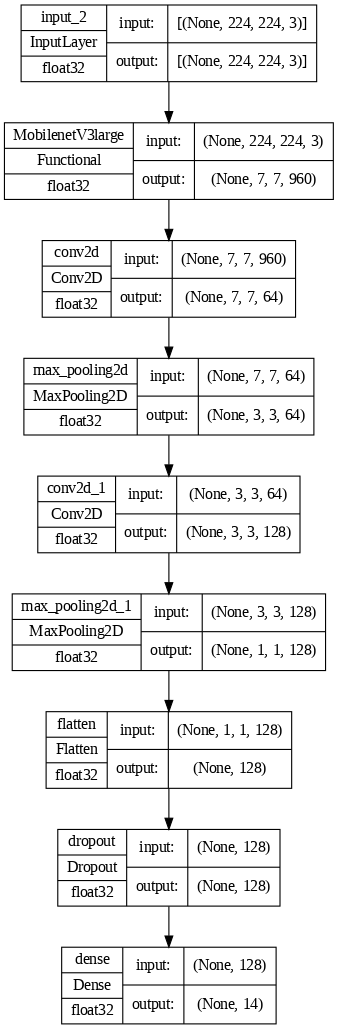

In [16]:
tf.keras.utils.plot_model(keras_model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=80)

Implementasi Callback

In [17]:
checkpoint = ModelCheckpoint("my_keras_model.keras", save_best_only=True) # Change the file extension to .keras

In [18]:
early_stopping =EarlyStopping(patience=5, restore_best_weights=True)

In [19]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Use fit instead of fit_generator
hist=keras_model.fit(train,epochs=40,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/40
342/342 [==============================] - 38s 79ms/step - loss: 0.9055 - accuracy: 0.7362 - val_loss: 0.2773 - val_accuracy: 0.9186
Epoch 2/40
342/342 [==============================] - 22s 63ms/step - loss: 0.3276 - accuracy: 0.9040 - val_loss: 0.1657 - val_accuracy: 0.9457
Epoch 3/40
342/342 [==============================] - 24s 68ms/step - loss: 0.2070 - accuracy: 0.9381 - val_loss: 0.1281 - val_accuracy: 0.9619
Epoch 4/40
342/342 [==============================] - 27s 79ms/step - loss: 0.1468 - accuracy: 0.9543 - val_loss: 0.1057 - val_accuracy: 0.9699
Epoch 5/40
342/342 [==============================] - 23s 66ms/step - loss: 0.1100 - accuracy: 0.9683 - val_loss: 0.1587 - val_accuracy: 0.9586
Epoch 6/40
342/342 [==============================] - 22s 64ms/step - loss: 0.1105 - accuracy: 0.9666 - val_loss: 0.1231 - val_accuracy: 0.9762
Epoch 7/40
342/342 [==============================] - 20s 59ms/step - loss: 0.0992 - accuracy: 0.9723 - val_loss: 0.1256 - val_accuracy:

In [20]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,0.905522,0.736210,0.277265,0.918622
1,0.327626,0.903977,0.165723,0.945748
2,0.206954,0.938061,0.128094,0.961877
3,0.146846,0.954279,0.105651,0.969941
4,0.109960,0.968298,0.158723,0.958578
5,0.110463,0.966648,0.123099,0.976173
6,0.099199,0.972329,0.125565,0.974707
7,0.101633,0.971413,0.092807,0.979106
8,0.052077,0.984790,0.109990,0.979472
9,0.086612,0.977369,0.128743,0.974340


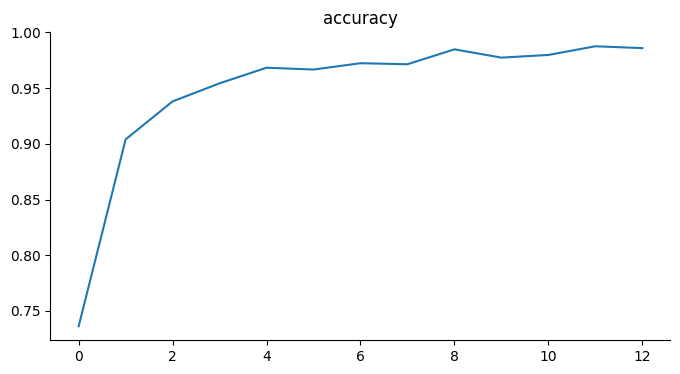

In [21]:
from matplotlib import pyplot as plt
hist_['accuracy'].plot(kind='line', figsize=(8, 4), title='accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

## Evaluasi dan Visualisasi

In [22]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

86/86 [==============================] - 5s 50ms/step - loss: 0.0928 - accuracy: 0.9791
Test Loss = 0.09280648082494736
Test Accuracy = 0.9791055917739868


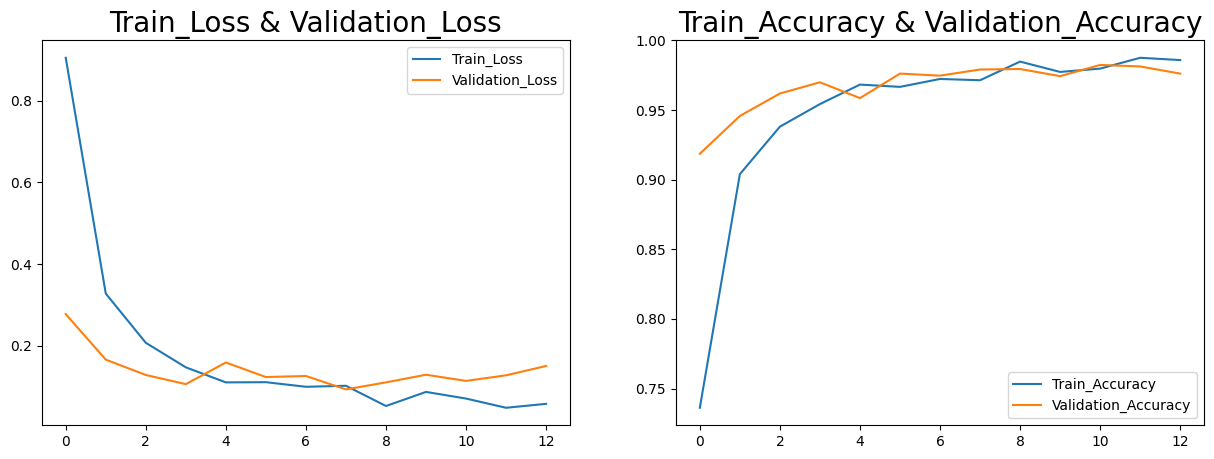

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

## Konversi Model

convert model menjadi format .h5

In [24]:
keras_model.save("model.h5")

# Konversi TFJS <br>
convert model menjadi format TFJS

In [25]:
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model

2024-09-03 01:49:51.167292: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-03 01:49:51.167349: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-03 01:49:51.168727: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-03 01:49:52.192189: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 5, in <module>
    from tensorflowjs.converters.converter import pip_main
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/__init__.py", line

# Konversi TFLite <br>
convert model menjadi format saved_model

In [26]:
# Menyimpan model TFLITE
model_TFLITE = tf.keras.models.load_model('model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model_TFLITE)
tflite_model = converter.convert()

# Buat direktori tflite jika belum ada
import os
os.makedirs('tflite', exist_ok=True)

# Simpan model TFLite
with open('tflite/model.tflite', 'wb') as f:
    f.write(tflite_model)

# Simpan label.txt
class_names = ['astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy',
                'carnation', 'common_daisy', 'coreopsis', 'dandelion', 'iris',
                'rose', 'sunflower', 'tulip', 'water_lily']

with open('tflite/label.txt', 'w') as f:
    for name in class_names:
        f.write(name + '\n')

# Konversi SavedModel <br>
convert model menjadi format saved_model

In [27]:
# Menyimpan model SavedModel
save_path = 'saved_model'
tf.saved_model.save(model_TFLITE, save_path)

In [28]:
!pip freeze > requirements.txt

## Inference (Optional)

In [45]:
from google.colab import files
uploaded = files.upload()

# Dapatkan nama file yang di-upload
uploaded_file_name = list(uploaded.keys())[0]
print(f"Uploaded file name: {uploaded_file_name}")

Saving 68963342_5e9ba27107_c.jpg to 68963342_5e9ba27107_c.jpg
Uploaded file name: 68963342_5e9ba27107_c.jpg


In [43]:
class_names

['astilbe',
 'bellflower',
 'black_eyed_susan',
 'calendula',
 'california_poppy',
 'carnation',
 'common_daisy',
 'coreopsis',
 'dandelion',
 'iris',
 'rose',
 'sunflower',
 'tulip',
 'water_lily']

Predicted class: carnation


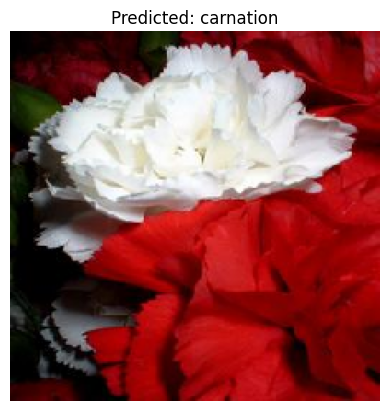

In [52]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/content/tflite/model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Prepare the image
img_path = '6105173_d0b6a55d9e_c.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array.astype('float32')

# Set the tensor to the image
interpreter.set_tensor(input_details[0]['index'], img_array)

# Run inference
interpreter.invoke()

# Get the output
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_class = np.argmax(output_data, axis=1)

print(f'Predicted class: {class_names[predicted_class[0]]}')

# Display the image and the prediction
plt.imshow(img)
plt.title(f'Predicted: {class_names[predicted_class[0]]}')
plt.axis('off')
plt.show()

Predicted class: black_eyed_susan


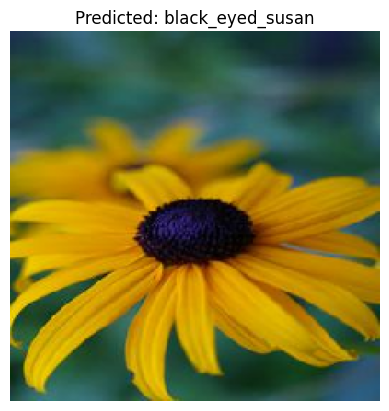

In [51]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/content/tflite/model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Prepare the image
img_path = '87166799_aabc23303a_c.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array.astype('float32')

# Set the tensor to the image
interpreter.set_tensor(input_details[0]['index'], img_array)

# Run inference
interpreter.invoke()

# Get the output
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_class = np.argmax(output_data, axis=1)

print(f'Predicted class: {class_names[predicted_class[0]]}')

# Display the image and the prediction
plt.imshow(img)
plt.title(f'Predicted: {class_names[predicted_class[0]]}')
plt.axis('off')
plt.show()

Predicted class: rose


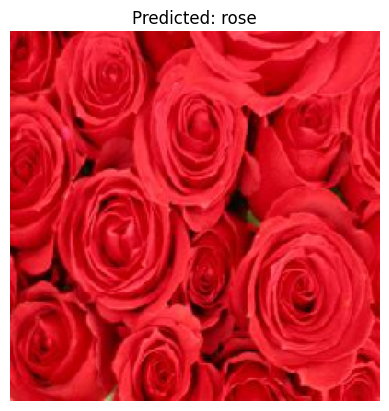

In [49]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/content/tflite/model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Prepare the image
img_path = '68963342_5e9ba27107_c.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array.astype('float32')

# Set the tensor to the image
interpreter.set_tensor(input_details[0]['index'], img_array)

# Run inference
interpreter.invoke()

# Get the output
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_class = np.argmax(output_data, axis=1)

print(f'Predicted class: {class_names[predicted_class[0]]}')

# Display the image and the prediction
plt.imshow(img)
plt.title(f'Predicted: {class_names[predicted_class[0]]}')
plt.axis('off')
plt.show()